# Comentários e estrutura do projeto

O notebook está dividido em seções com seus respectivos comentários. \\
Segue então: \\
 'Bibiliotecas utilizadas' junto as suas principais funções. \\
 'Variação dos Hiperparametros' -> Para a escolha das melhores configuraçoes para cada algoritmo \\
 'Comparação' -> Realização da diferença absoluta para os dois melhores algoritmos  \\

 'Variação dos Hiperparametros' \\


# Bibliotecas utilizadas

In [ ]:
!pip install imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#Configuracoes de hiperparametros
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from mlxtend.plotting import plot_decision_regions
import collections

MLP_classifier = MLPClassifier(random_state=1, max_iter=300)
knn_classifier = KNeighborsClassifier(n_neighbors=10)
tree_classifier = DecisionTreeClassifier()
NVB_classifier = GaussianNB()


from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

#Tratamento de dados desbalanceados Oversampling e Undersampling
from imblearn.over_sampling import SMOTE
SMT= SMOTE()

from imblearn.under_sampling import NearMiss
NS = NearMiss()

from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

#Scalling dos dados
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

from sklearn.utils import shuffle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Variação de hiperparametros


In [ ]:
def hiperparametros(X,y):
  #KNN
  Hiperparameters_knn= {'n_neighbors' : [1,5,10,13,15]}
  KNN=KNeighborsClassifier()
  #Crossvalidation com variação de parametros
  Gs_knn= GridSearchCV(KNN, Hiperparameters_knn, cv=10, scoring='accuracy')
  Gs_knn.fit(X,y)

  #Criação da tabela
  R_knn=pd.DataFrame(Gs_knn.cv_results_)
  view = ['params','mean_test_score','std_test_score','rank_test_score']
  R_knn[view].sort_values(by='rank_test_score')

  #MLP
  Hiperparameters_mlp= {'hidden_layer_sizes' : [(10),(20),(30),(150)],
		   'max_iter': [200], 'random_state':[30]}
  MLP=MLPClassifier()
  Gs_mlp= GridSearchCV(MLP, Hiperparameters_mlp, cv=10, scoring='accuracy')
  Gs_mlp.fit(X,y)

   #Criação da tabela
  R_mlp=pd.DataFrame(Gs_mlp.cv_results_)
  view = ['params','mean_test_score','std_test_score','rank_test_score']
  R_mlp[view].sort_values(by='rank_test_score')

  #Decision Tree
  Hiperparameters_DT= {'criterion' : [('gini'),('entropy')],
		   'max_depth': [(10), (20)]  }
  DT= DecisionTreeClassifier()
  Gs_DT= GridSearchCV(DT, Hiperparameters_DT, cv=10, scoring='accuracy')
  Gs_DT.fit(X1,y1)

   #Criação da tabela
  R_DT=pd.DataFrame(Gs_DT.cv_results_)
  view = ['params','mean_test_score','std_test_score','rank_test_score']
  R_DT[view].sort_values(by='rank_test_score')

  return [R_knn[view], R_mlp[view], R_DT[view]]


# Comparação

função que retorna a média do score para cada método, a média dos erros e seus desvios padrão

In [ ]:
def ai_method_compare(X,y,crit,md,nviz,miter,hdl):

  #Instanciando os metodos com os hiperparametros definidos
  tree_classifier = DecisionTreeClassifier(criterion=crit, max_depth=md)

  knn_classifier = KNeighborsClassifier(n_neighbors=nviz)

  MLP_classifier = MLPClassifier(random_state=30, max_iter=miter, hidden_layer_sizes=hdl)

  NVB_classifier = GaussianNB()

  #Calculo do erro para cada particao da cross validation
  score_tree = cross_val_score(tree_classifier, X, y, cv=10)
  erro_tree = [1,1,1,1,1,1,1,1,1,1] - score_tree

  #Calculo da media e do desvio padrao para calculo posterior da diferencao absoluta
  m_score_tree =  erro_tree.mean()
  dp_score_tree = np.std(erro_tree)

  score_knn = cross_val_score(knn_classifier, X, y, cv=10)
  erro_knn = [1,1,1,1,1,1,1,1,1,1] - score_knn

  m_score_knn =  erro_knn.mean()
  dp_score_knn = np.std(erro_knn)

  score_mlp = cross_val_score(MLP_classifier, X, y, cv=10)
  erro_mlp = [1,1,1,1,1,1,1,1,1,1] - score_mlp

  m_score_mlp =  erro_mlp.mean()
  dp_score_mlp = np.std(erro_mlp)

  score_nvb = cross_val_score(NVB_classifier, X, y, cv=10)
  erro_nvb = [1,1,1,1,1,1,1,1,1,1] - score_nvb

  m_score_nvb =  erro_nvb.mean()
  dp_score_nvb = np.std(erro_nvb)

  print("arvore: "+str(score_tree.mean()*100)+"%, knn: " +str(score_knn.mean()*100)+"%, mlp: "+str(score_mlp.mean()*100)+"%, naive bayes: "+str(score_nvb.mean()*100)+"%")


  return [score_tree.mean()*100, score_knn.mean()*100, score_mlp.mean()*100, score_nvb.mean()*100],[m_score_tree,  m_score_knn,  m_score_mlp,m_score_nvb],[dp_score_tree,dp_score_knn,dp_score_mlp,dp_score_nvb]

calculo da diferença absoluta

In [ ]:
def dif_abs(mean1,std1,mean2,std2):
  media = mean1-mean2
  dp = np.sqrt((std1**2+std2**2)/2)
  return media/dp

#Dataset1

Iris -> 'Importando e descrevendo atráves da DataFrame as principais features do Dataset'

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = pd.DataFrame(iris.data, columns=iris.feature_names)

data1['target'] = iris.target

X1 = data1.drop('target', axis = 1)
y1 = data1['target']

data1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Escolha dos melhores hiperparametros

In [ ]:
hiperparametros(X1,y1)

[                params  mean_test_score  std_test_score  rank_test_score
 0   {'n_neighbors': 1}         0.960000        0.053333                5
 1   {'n_neighbors': 5}         0.966667        0.044721                3
 2  {'n_neighbors': 10}         0.966667        0.044721                3
 3  {'n_neighbors': 13}         0.980000        0.030551                1
 4  {'n_neighbors': 15}         0.973333        0.032660                2,
                                               params  mean_test_score  \
 0  {'hidden_layer_sizes': 10, 'max_iter': 200, 'r...         0.840000   
 1  {'hidden_layer_sizes': 20, 'max_iter': 200, 'r...         0.666667   
 2  {'hidden_layer_sizes': 30, 'max_iter': 200, 'r...         0.953333   
 3  {'hidden_layer_sizes': 150, 'max_iter': 200, '...         0.973333   
 
    std_test_score  rank_test_score  
 0        0.067987                3  
 1        0.051640                4  
 2        0.042687                2  
 3        0.044222             

Comparacao dos metodos



In [ ]:
score1,mean1,std1 = ai_method_compare(X1,y1,'gini',10,15,200,150)

arvore: 96.0%, knn: 97.33333333333334%, mlp: 97.33333333333334%, naive bayes: 95.33333333333334%


Decision Tree

In [ ]:
tree_classifier = DecisionTreeClassifier()
scores = 1 * cross_val_score(tree_classifier, X1, y1, cv=10)

a = scores.mean()*100
print("score: "+str(a)+"%")


score: 96.0%


Exemplo grafico da arvore de decisao mostrando os hiperparamateros como indice de gini, profundidade ...



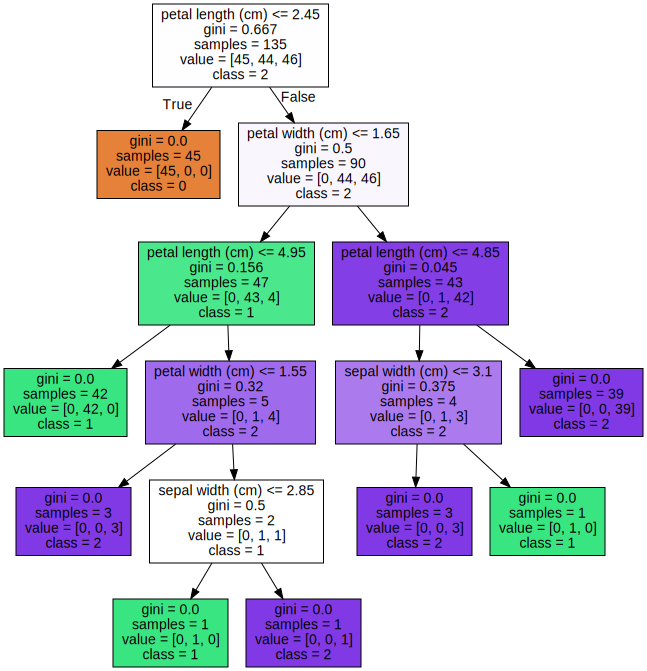

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.1)
tree_classifier.fit(X_train, y_train)
from sklearn import tree
dot_data = tree.export_graphviz(tree_classifier, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=['0','1','2'],
                                filled=True)
# Draw graph
import graphviz
graph = graphviz.Source(dot_data, format="png")
graph


Resultado da classificação utilizando o 10-cross fold validation

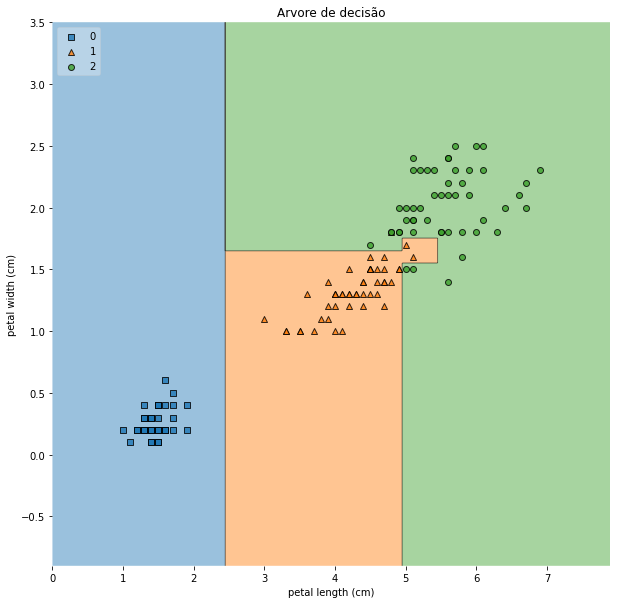

In [ ]:
def tree_comparison(data):
  x = data[['petal length (cm)','petal width (cm)']].values
  y = data['target'].astype(int).values
  clf = DecisionTreeClassifier()
  clf.fit(x, y)
# Plotting decision region
  fig = plt.figure(figsize= (10, 10))
  plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations

  plt.xlabel('petal length (cm)')
  plt.ylabel('petal width (cm)')
  plt.title('Arvore de decisão')

tree_comparison(data1)

KNN - KNeighborsClassifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=15)
# knn_classifier.fit(X_train, y_train)
# y_pred_knn = knn_classifier.predict(X_test)
scores = 1 * cross_val_score(knn_classifier, X1, y1, cv=10)

a = scores.mean()*100
print("score: "+str(a)+"%")

score: 97.33333333333334%


Resultado da classificação utilizando o 10-cross fold validation

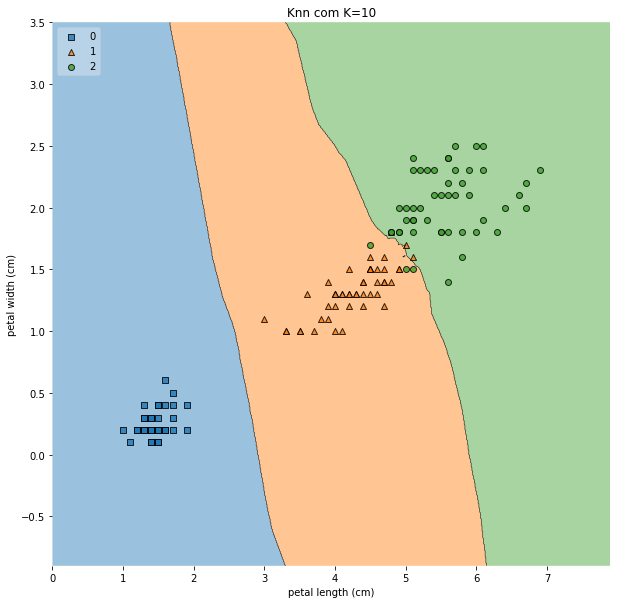

In [ ]:
def knn_comparison(data, k):
  x = data[['petal length (cm)','petal width (cm)']].values
  y = data['target'].astype(int).values
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x, y)
# Plotting decision region
  fig = plt.figure(figsize= (10, 10))
  plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations

  plt.xlabel('petal length (cm)')
  plt.ylabel('petal width (cm)')
  plt.title('Knn com K='+ str(k))


knn_comparison(data1, 10)


Multilayer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

MLP_classifier = MLPClassifier(random_state=1, max_iter=300)
scores = 1 * cross_val_score(MLP_classifier, X1, y1, cv=10)

a = scores.mean()*100
print("score: "+str(a)+"%")


score: 98.00000000000001%


Resultado da classificação utilizando o 10-cross fold validation

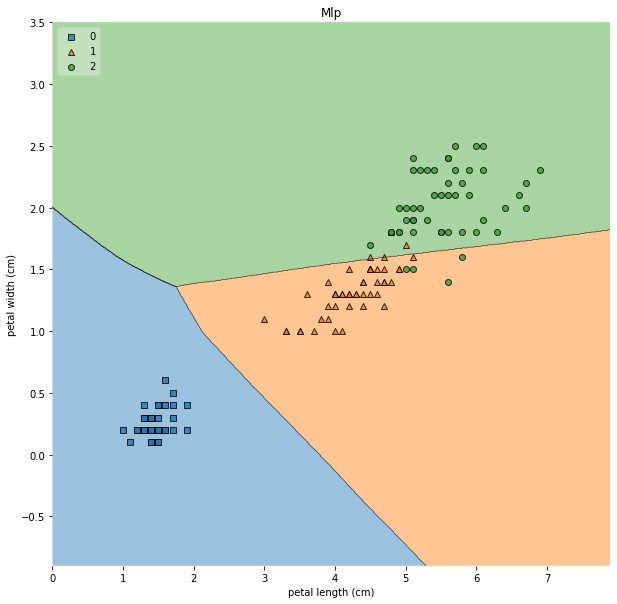

In [ ]:
def mlp_comparison(data):
  x = data[['petal length (cm)','petal width (cm)']].values
  y = data['target'].astype(int).values
  clf = MLPClassifier(random_state=1, max_iter=300)
  clf.fit(x, y)
# Plotting decision region
  fig = plt.figure(figsize= (10, 10))
  plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations

  plt.xlabel('petal length (cm)')
  plt.ylabel('petal width (cm)')
  plt.title('Mlp')


mlp_comparison(data1)

Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NVB_classifier = GaussianNB()

scores = 1 * cross_val_score(NVB_classifier, X1, y1, cv=10)

In [ ]:
a = scores.mean()*100
print("score: "+str(a)+"%")

score: 95.33333333333334%


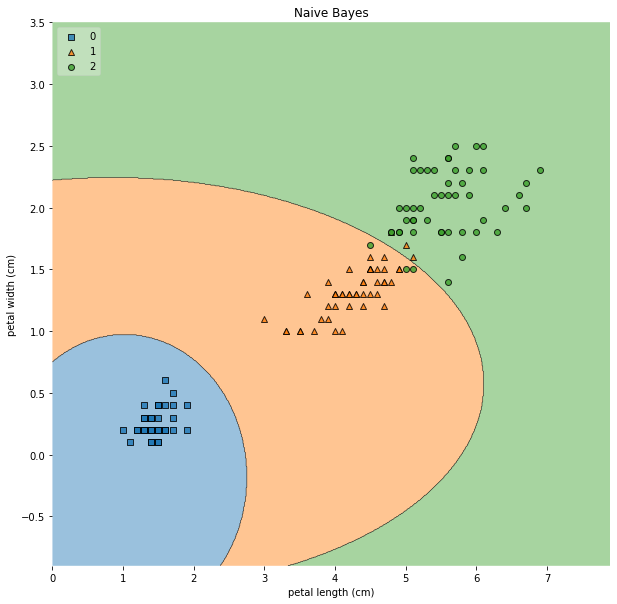

In [ ]:
def nvb_comparison(data):
  x = data[['petal length (cm)','petal width (cm)']].values
  y = data['target'].astype(int).values
  clf = GaussianNB()
  clf.fit(x, y)
# Plotting decision region
  fig = plt.figure(figsize= (10, 10))
  plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations

  plt.xlabel('petal length (cm)')
  plt.ylabel('petal width (cm)')
  plt.title('Naive Bayes')

nvb_comparison(data1)

# Dataset2

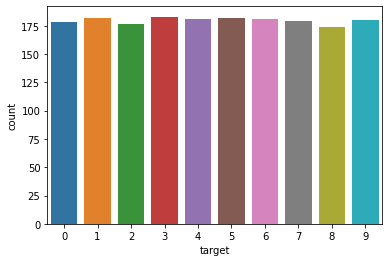

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

data2 = pd.DataFrame(digits.data, columns=digits.feature_names)

data2['target'] = digits.target

X2 = data2.drop('target', axis = 1)
y2 = data2['target']

sns.countplot(y2)

In [ ]:
hiperparametros(X2,y2)

[                params  mean_test_score  std_test_score  rank_test_score
 0   {'n_neighbors': 1}         0.974963        0.017080                1
 1   {'n_neighbors': 5}         0.971074        0.017169                2
 2  {'n_neighbors': 10}         0.962163        0.020458                4
 3  {'n_neighbors': 13}         0.963271        0.021847                3
 4  {'n_neighbors': 15}         0.962157        0.020634                5,
                                               params  mean_test_score  \
 0  {'hidden_layer_sizes': 10, 'max_iter': 200, 'r...         0.907641   
 1  {'hidden_layer_sizes': 20, 'max_iter': 200, 'r...         0.932635   
 2  {'hidden_layer_sizes': 30, 'max_iter': 200, 'r...         0.930990   
 3  {'hidden_layer_sizes': 150, 'max_iter': 200, '...         0.953821   
 
    std_test_score  rank_test_score  
 0        0.039098                4  
 1        0.030852                2  
 2        0.035810                3  
 3        0.030019             

In [ ]:
score2,mean2,std2 = ai_method_compare(X1,y1,'entropy',10,1,200,150)


arvore: 95.33333333333334%, knn: 96.0%, mlp: 97.33333333333334%, naive bayes: 95.33333333333334%


# Dataset3

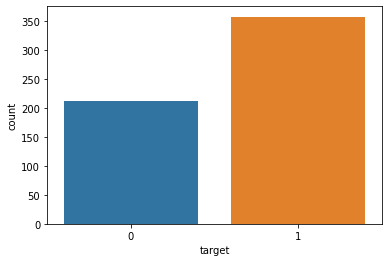

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

data3 = pd.DataFrame(cancer.data, columns=cancer.feature_names)

data3['target'] = cancer.target

X3 = data3.drop('target', axis=1)
y3 = data3.target

sns.countplot(y3)

In [ ]:
hiperparametros(X3,y3)

[                params  mean_test_score  std_test_score  rank_test_score
 0   {'n_neighbors': 1}         0.915695        0.030086                5
 1   {'n_neighbors': 5}         0.929762        0.029282                3
 2  {'n_neighbors': 10}         0.931516        0.034542                1
 3  {'n_neighbors': 13}         0.931516        0.037119                1
 4  {'n_neighbors': 15}         0.929762        0.036741                3,
                                               params  mean_test_score  \
 0  {'hidden_layer_sizes': 10, 'max_iter': 200, 'r...         0.855984   
 1  {'hidden_layer_sizes': 20, 'max_iter': 200, 'r...         0.627412   
 2  {'hidden_layer_sizes': 30, 'max_iter': 200, 'r...         0.928039   
 3  {'hidden_layer_sizes': 150, 'max_iter': 200, '...         0.940320   
 
    std_test_score  rank_test_score  
 0        0.045423                3  
 1        0.006966                4  
 2        0.022732                2  
 3        0.022409             

In [ ]:
score3,mean3,std3 = ai_method_compare(X3,y3,'entropy',10,10,200,150)

arvore: 92.61904761904762%, knn: 93.15162907268169%, mlp: 94.03195488721805%, naive bayes: 93.67794486215537%


# Dataset4

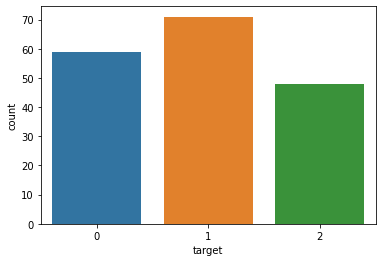

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

data4 = pd.DataFrame(wine.data, columns=wine.feature_names)

data4['target'] = wine.target

X4 = data4.drop('target', axis=1)
y4 = data4.target

sns.countplot(y4)

In [ ]:
hiperparametros(X4,y4)

[                params  mean_test_score  std_test_score  rank_test_score
 0   {'n_neighbors': 1}         0.748039        0.095405                1
 1   {'n_neighbors': 5}         0.675490        0.069908                5
 2  {'n_neighbors': 10}         0.697386        0.064342                3
 3  {'n_neighbors': 13}         0.691830        0.064356                4
 4  {'n_neighbors': 15}         0.719935        0.057983                2,
                                               params  mean_test_score  \
 0  {'hidden_layer_sizes': 10, 'max_iter': 200, 'r...         0.269281   
 1  {'hidden_layer_sizes': 20, 'max_iter': 200, 'r...         0.399346   
 2  {'hidden_layer_sizes': 30, 'max_iter': 200, 'r...         0.331373   
 3  {'hidden_layer_sizes': 150, 'max_iter': 200, '...         0.911111   
 
    std_test_score  rank_test_score  
 0        0.016993                4  
 1        0.024707                2  
 2        0.013725                3  
 3        0.066667             

In [ ]:
score4,mean4,std4 = ai_method_compare(X4,y4,'entropy',20,1,200,150)

arvore: 89.86928104575163%, knn: 74.80392156862746%, mlp: 91.11111111111111%, naive bayes: 97.77777777777779%


In [ ]:
def ai_method_compare(X,y):
  if len(y)>2000:
    it=30
  else:
    it=300

  tree_classifier = DecisionTreeClassifier()
  knn_classifier = KNeighborsClassifier(n_neighbors=30)
  MLP_classifier = MLPClassifier(random_state=1, max_iter=it)
  NVB_classifier = GaussianNB()

  score_tree = cross_val_score(tree_classifier, X, y, cv=10)
  erro_tree = [1,1,1,1,1,1,1,1,1,1] - score_tree

  m_score_tree =  erro_tree.mean()
  dp_score_tree = np.std(erro_tree)

  score_knn = cross_val_score(knn_classifier, X, y, cv=10)
  erro_knn = [1,1,1,1,1,1,1,1,1,1] - score_knn

  m_score_knn =  erro_knn.mean()
  dp_score_knn = np.std(erro_knn)

  score_mlp = cross_val_score(MLP_classifier, X, y, cv=10)
  erro_mlp = [1,1,1,1,1,1,1,1,1,1] - score_mlp

  m_score_mlp =  erro_mlp.mean()
  dp_score_mlp = np.std(erro_mlp)

  score_nvb = cross_val_score(NVB_classifier, X, y, cv=10)
  erro_nvb = [1,1,1,1,1,1,1,1,1,1] - score_nvb

  m_score_nvb =  erro_nvb.mean()
  dp_score_nvb = np.std(erro_nvb)

  print("arvore: "+str(score_tree.mean()*100)+"%, knn: " +str(score_knn.mean()*100)+"%, mlp: "+str(score_mlp.mean()*100)+"%, naive bayes: "+str(score_nvb.mean()*100)+"%")


  return [score_tree.mean()*100, score_knn.mean()*100, score_mlp.mean()*100, score_nvb.mean()*100],[m_score_tree,  m_score_knn,  m_score_mlp,m_score_nvb],[dp_score_tree,dp_score_knn,dp_score_mlp,dp_score_nvb]

# Dataset5

492
284315


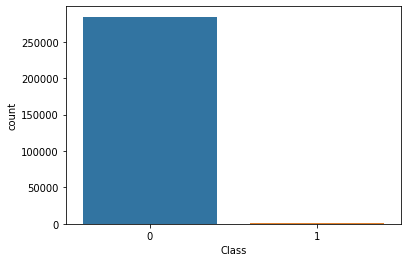

In [ ]:
data5 = pd.read_csv('/content/drive/Shareddrives/IA/Datasets/creditcard.csv')
print(sum(data5['Class']==1))
print(sum(data5['Class']==0))

X5=data5.drop("Class", axis=1)
y5=data5['Class']

sns.countplot(y5)

##ajuste por undersamplimg através da técnica de nearmiss
X5_nm,y5_nm = NS.fit_resample(X5,y5)
col = X5.columns

##ajuste das escalas dos parâmetros
for j in range(len(col)):
  X5_nm[col[j]] = std_scaler.fit_transform(X5_nm[col[j]].values.reshape(-1,1))

X5_nm = pd.DataFrame(X5_nm)

##grafico dos dados desbalanceados
sns.countplot(y5_nm)

gráfico dos dados balanceados


Text(0.5, 1.0, 'Fraude no cartão \n (0: Não || 1: sim)')

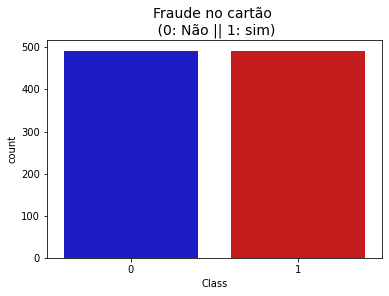

In [ ]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(y5_nm, palette=colors)
plt.title('Fraude no cartão \n (0: Não || 1: sim)', fontsize=14)

In [ ]:
Resultados

In [ ]:
score5,mean5,std5 = ai_method_compare(X5_nm,y5_nm)

arvore: 94.51350237064521%, knn: 91.65635951350237%, mlp: 95.4215625644197%, naive bayes: 92.47165532879819%


# Dataset6

In [ ]:
data6 = pd.read_csv('/content/drive/Shareddrives/IA/Datasets/neo.csv')
data6.dropna(subset=data6.columns, inplace=True)
data6 = data6.drop(['name', 'orbiting_body', 'id', 'sentry_object'], axis=1)
data6['hazardous'] = data6['hazardous']*1

X6=data6.drop("hazardous", axis=1)
y6=data6['hazardous']

X6_nm,Y6_nm = NS.fit_resample(X6,y6)
col = X6_nm.columns

for j in range(len(col)):
  X6_nm[col[j]] = std_scaler.fit_transform(X6_nm[col[j]].values.reshape(-1,1))

X6_nm = pd.DataFrame(X6_nm)

dados balanceados

Text(0.5, 1.0, 'Perigo \n (0: Não  || 1: Sim)')

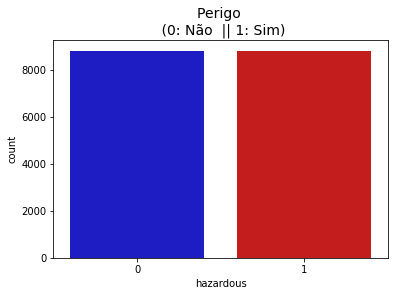

In [ ]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(Y6_nm, palette=colors)
plt.title('Perigo \n (0: Não  || 1: Sim)', fontsize=14)

resultados

In [ ]:
score6,mean6,std6 = ai_method_compare(X6_nm,Y6_nm)

arvore: 81.20475113122171%, knn: 83.99886877828054%, mlp: 86.48190045248867%, naive bayes: 83.69343891402717%


# Dataset7


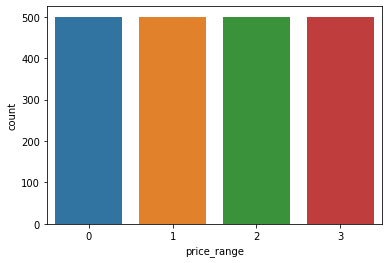

In [ ]:
data7 = pd.read_csv('/content/drive/Shareddrives/IA/Datasets/mobile_train.csv')
sns.countplot(data7['price_range']) ## já balanceado

X7 = data7.drop('price_range', axis=1)
y7 = data7['price_range']
col=X7.columns

for j in range(len(col)):
  X7[col[j]] = std_scaler.fit_transform(X7[col[j]].values.reshape(-1,1))

X7 = pd.DataFrame(X7)

sns.countplot(y7)

dados já estavam balanceados quando obtidos

In [ ]:
score7,mean7,std7 = ai_method_compare(X7,y7)

arvore: 83.65%, knn: 54.800000000000004%, mlp: 91.85000000000001%, naive bayes: 81.2%


# Dataset8


In [ ]:
data8=pd.read_csv('/content/drive/Shareddrives/IA/Datasets/bank-full.csv',';')

data8

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data8["default"]=data8["default"].map({"no":0,"yes":1})
data8["housing"]=data8["housing"].map({"no":0,"yes":1})
data8["loan"]=data8["loan"].map({"no":0 ,"yes":1})
data8["y"]=data8["y"].map({"no":0,"yes":1})
data8.education = data8.education.map({"primary":0, "secondary":1,"tertiary":2})
data8.poutcome=data8.poutcome.map({"unknown":0, "failure":1,"other":2,"success":3})
data8.contact=data8.contact.map({"cellular":0, "unknown":1,"telephone":2})
data8.month = pd.to_datetime(data8.month, format = "%b").dt.month

Elimando os valores faltantes e organizando os valores categórica

In [ ]:
data8.dropna(inplace = True)
data8 = pd.get_dummies(data8)
data8.head()


,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2.0,0,2143,1,0,1,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1.0,0,29,1,0,1,5,5,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1.0,0,2,1,1,1,5,5,76,...,0,0,0,0,0,0,0,0,1,0
5,35,2.0,0,231,1,0,1,5,5,139,...,0,0,0,0,0,0,0,0,1,0
6,28,2.0,0,447,1,1,1,5,5,217,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'Aprovação de crédito \n (0: Não aprovado || 1: Aprovado)')

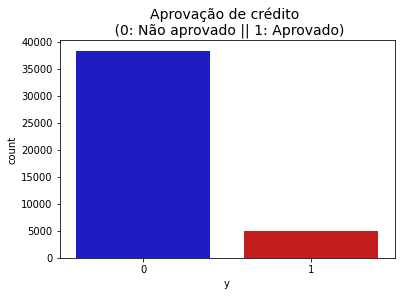

In [ ]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('y', data=data8, palette=colors)
plt.title('Aprovação de crédito \n (0: Não aprovado || 1: Aprovado)', fontsize=14)



Balanceamento do dataset atraves do NearMiss (Undersampling)

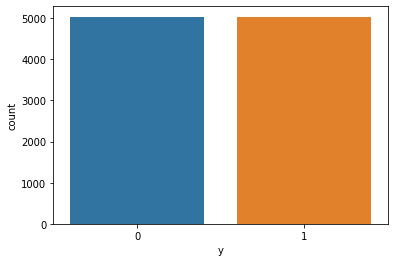

In [ ]:
X = data8.drop("y", axis =1)
y = data8.y

X, y=  NS.fit_resample(X,y)
ax=sns.countplot(x=y)

Aplicando os algortimos de classificação

In [ ]:
score8,mean8,std8 = ai_method_compare(X,y)

arvore: 84.33748482842326%, knn: 87.6316873157737%, mlp: 89.58675186393657%, naive bayes: 83.56411862990811%


# Dataset9


Dataset para classifição de cogumelos comestíveis ('e'=edible) ou não ('p'=poisonous) atráves de características físicas.

In [ ]:
data9 = pd.read_csv('/content/drive/Shareddrives/IA/Datasets/mushrooms.csv')
data9.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data9.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Dados balanceados sem valores nulos.

Text(0.5, 1.0, 'Venenoso ou Comestível \n (p: V || e: C)')

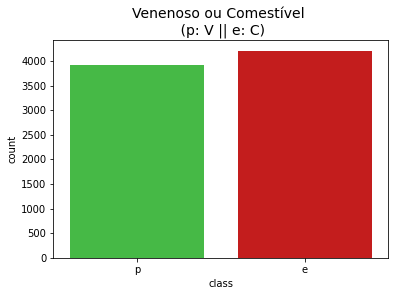

In [ ]:
colors = ["#33CC33", "#DF0101"]
sns.countplot('class', data=data9, palette=colors)
plt.title('Venenoso ou Comestível \n (p: V || e: C)', fontsize=14)

In [ ]:
data9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

É possível observar várias features catégoricas então precisaremos trata o dataset além de separa as variáveis X,y.

In [ ]:
X9 = data9.drop('class', axis = 1)
y9 = data9['class']

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
d = defaultdict (LabelEncoder)
Xfit = X9.apply(lambda x: d[x.name].fit_transform(x))

le_y = LabelEncoder()
yfit = le_y.fit_transform(y9)

yfit=pd.DataFrame(yfit)



In [ ]:
score9,mean9,std9 = ai_method_compare(Xfit,yfit)


arvore: 96.11225225552748%, knn: 94.2650676506765%, mlp: 92.91029696011245%, naive bayes: 84.63860057319785%


# Dataset10


Para a classificação de enxaqueca apenas com features numéricas

In [ ]:
data10 = pd.read_csv('/content/drive/Shareddrives/IA/Datasets/data-migraine.csv')
data10.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [ ]:
data10.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [ ]:
classes=data10['Type'].unique().tolist()
print(classes)

['Typical aura with migraine', 'Migraine without aura', 'Basilar-type aura', 'Sporadic hemiplegic migraine', 'Familial hemiplegic migraine', 'Other', 'Typical aura without migraine']


Text(0.5, 1.0, 'Tipos de enxaqueca')

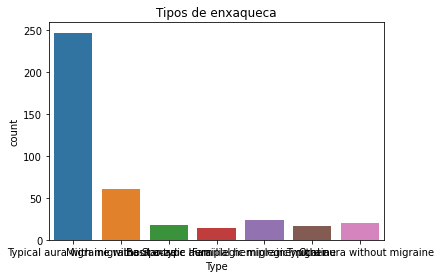

In [ ]:
sns.countplot('Type', data=data10)
plt.title('Tipos de enxaqueca')

Dados desbalanceados precisamos fazer um Oversampling atráves do SMOTE com as classes minoritárias para igual com a classe majoritária.


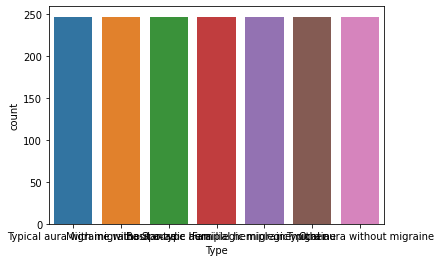

In [ ]:
X10 = data10.drop('Type', axis = 1)
y10 = data10['Type']

X10, y10 = SMT.fit_resample (X10, y10)

ax=sns.countplot(x=y10)

In [ ]:
score10,mean10,std10 = ai_method_compare(X10,y10)


arvore: 94.91094233095848%, knn: 77.96545234574539%, mlp: 92.02043285387822%, naive bayes: 81.14733163059552%


#Comparações

Inicialmente, foram armazenados os valores dos scores, médias dos erros e seus desvio padrão para cada dataset. A média de desempenho final é mostrada abaixo.

In [ ]:
scores = pd.DataFrame(np.array([score1,score2,score3,score4,score5,score6,score7,score8,score9,score10]), columns=["tree","knn","mlp","naive bayes"])
media_erros = pd.DataFrame(np.array([mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10]), columns=["tree","knn","mlp","naive bayes"])
std_erros = pd.DataFrame(np.array([std1,std2,std3,std4,std5,std6,std7,std8,std9,std10]), columns=["tree","knn","mlp","naive bayes"])

col = scores.columns
scores_media = []
for j in range(4):
  scores_media.append(scores[col[j]].mean())

scores_media

[90.85505949149088, 85.1606319578621, 92.80806773598314, 88.88375343831268]

Aqui são adicionadas duas colunas aos scores mostrando os dois melhores métodos para cada dataset.

In [ ]:
## vencedores de cada dataset

v = []

for j in range(10):
  v.append(np.array(scores.loc[[j],["tree","knn","mlp","naive bayes"]]))

for j in range(10):
  for i in range(4):
    a = np.array(scores.loc[[j],[col[i]]])
    a = a[0]
    a = a[0]
    a = round(a,6)
    b = v[j].max()
    b = round(b,6)
    if a==b:
        scores.loc[j,'winner']=col[i]
        scores.loc[j,'2 winner']=-1

for j in range(10):
  aux = scores.loc[j].drop([scores.loc[j,'winner'],"winner","2 winner"])
  for i in range(4):
    a = np.array(scores.loc[[j],[col[i]]])
    a = a[0]
    a = a[0]
    a = round(a,6)
    b = aux.max()
    b = round(b,6)
    if a==b:
        scores.loc[j,'2 winner']=col[i]


scores.loc[0,'2 winner'] = 'knn'


In [ ]:
scores

,tree,knn,mlp,naive bayes,winner,2 winner
0,96.000000,97.333333,97.333333,95.333333,mlp,knn
1,95.333333,96.000000,97.333333,95.333333,mlp,knn
2,92.619048,93.151629,94.031955,93.677945,mlp,naive bayes
3,89.869281,74.803922,91.111111,97.777778,naive bayes,mlp
4,94.513502,91.656360,95.421563,92.471655,mlp,tree
5,81.204751,83.998869,86.481900,83.693439,mlp,knn
6,83.650000,54.800000,91.850000,81.200000,mlp,tree
7,84.337485,87.631687,89.586752,83.564119,mlp,knn
8,96.112252,94.265068,92.910297,84.638601,tree,knn
9,94.910942,77.965452,92.020433,81.147332,tree,mlp


In [ ]:
media_erros

,tree,knn,mlp,naive bayes
0,0.040000,0.026667,0.026667,0.046667
1,0.046667,0.040000,0.026667,0.046667
2,0.073810,0.068484,0.059680,0.063221
3,0.101307,0.251961,0.088889,0.022222
4,0.054865,0.083436,0.045784,0.075283
5,0.187952,0.160011,0.135181,0.163066
6,0.163500,0.452000,0.081500,0.188000
7,0.156625,0.123683,0.104132,0.164359
8,0.038877,0.057349,0.070897,0.153614
9,0.050891,0.220345,0.079796,0.188527


In [ ]:
std_erros

,tree,knn,mlp,naive bayes
0,0.044222,0.032660,0.044222,0.042687
1,0.042687,0.053333,0.044222,0.042687
2,0.031175,0.034542,0.022409,0.028444
3,0.087286,0.095405,0.066667,0.027217
4,0.029232,0.048596,0.023361,0.037965
5,0.010678,0.008202,0.008582,0.022267
6,0.023457,0.035721,0.011413,0.014866
7,0.073289,0.029772,0.028290,0.067166
8,0.094603,0.101696,0.129573,0.109761
9,0.024758,0.025283,0.027544,0.055456





Função para a obtenção da diferença absoluta

In [ ]:
def resultado(scores,media_erros,std_erros,linha):
  a = scores.loc[linha,'winner']
  b = scores.loc[linha,'2 winner']
  return pd.DataFrame(np.array([[dif_abs(media_erros.loc[linha,a],std_erros.loc[linha,a],media_erros.loc[linha,b],std_erros.loc[linha,b]),a,b]]), columns=["diferença","melhor","segundo melhor"])


aqui são computadas as diferenças absolutas e mostrados quais métodos estão sendo comparados para cada dataset.

In [ ]:
resultados = resultado(scores,media_erros,std_erros,0)

for j in range(1,len(scores)):
  resultados=resultados.append(resultado(scores,media_erros,std_erros,j), ignore_index = True)

resultados

,diferença,melhor,segundo melhor
0,0.0,mlp,knn
1,-0.2721655269759088,mlp,knn
2,-0.13825896467801302,mlp,naive bayes
3,-1.3093073414159542,naive bayes,mlp
4,-0.343179540570772,mlp,tree
5,-2.958090735826121,mlp,knn
6,-4.445440332541168,mlp,tree
7,-0.6732218206824887,mlp,knn
8,-0.18807863442359812,tree,knn
9,-1.1037474632451156,tree,mlp
